# Reading files 

In [1]:
# import libraries
import pandas as pd 
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore", category=Warning, )

In [2]:
# create train dataframe 
train_df = pd.read_csv('/Users/matheusmaciel/CASS/MSc 2021-22 /Term 3/NLP/nlp_fcp/data/train.csv')

# create test dataframe
test_df = pd.read_csv('/Users/matheusmaciel/CASS/MSc 2021-22 /Term 3/NLP/nlp_fcp/data/test.csv')

# view train dataframe
train_df.head()

,helpfulness_cat,imdb_user_review
0,1.0,It is hard to find such delightful and adorabl...
1,1.0,"They don't make films like this faded, hauntin..."
2,1.0,I first viewed this movie in 1924 at age 6 yrs...
3,1.0,I doubt that I'd ever seen anything resembling...
4,1.0,I was shocked to find myself riveted to this m...


# Exploratory data analysis

In [3]:
# describe train data
train_df.describe()

,helpfulness_cat
count,10755.000000
mean,0.763738
std,0.424805
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


1.0    8214
0.0    2541
Name: helpfulness_cat, dtype: int64


<AxesSubplot:xlabel='helpfulness_cat', ylabel='count'>

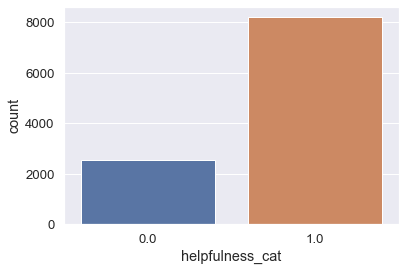

In [4]:
# get distribution of 'helpfulness_cat' column 
print(train_df['helpfulness_cat'].value_counts())  # 1 helpful review, 0 unhelpful 

#plot 
sns.set(style = "darkgrid" , font_scale = 1.2)
sns.countplot(train_df.helpfulness_cat)

Most reviews are considered helpful 

In [5]:
# get average length of text in 'imdb_user_review' column depending on if 'helpfulness_cat' == 1.0 or 0.0
train_df.groupby('helpfulness_cat').imdb_user_review.apply(lambda x: x.str.len().mean())

helpfulness_cat
0.0     749.332153
1.0    1066.435476
Name: imdb_user_review, dtype: float64

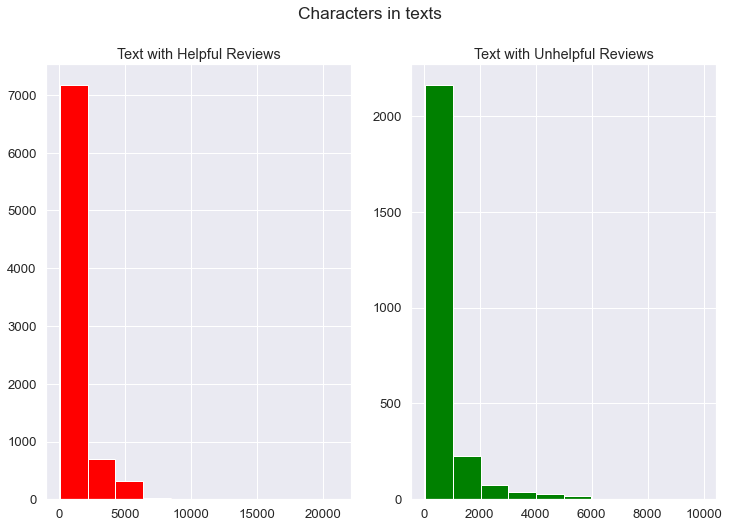

In [6]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=train_df[train_df['helpfulness_cat']==1]['imdb_user_review'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Text with Helpful Reviews')
text_len=train_df[train_df['helpfulness_cat']==0]['imdb_user_review'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Text with Unhelpful Reviews')
fig.suptitle('Characters in texts')
plt.show()

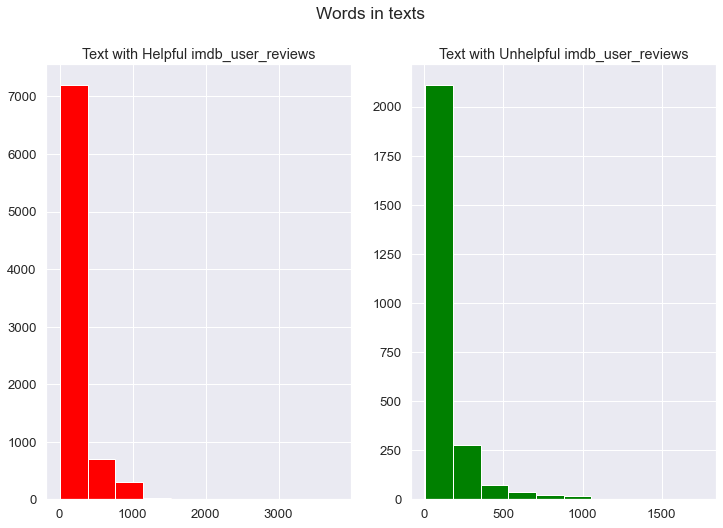

In [7]:
# plotting number of words in text
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=train_df[train_df['helpfulness_cat']==1]['imdb_user_review'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Text with Helpful imdb_user_reviews')
text_len=train_df[train_df['helpfulness_cat']==0]['imdb_user_review'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Text with Unhelpful imdb_user_reviews')
fig.suptitle('Words in texts')
plt.show()

On average, helpful reviews are longer than unhelpful ones 

# Data Pre-processing for NLP

Tokenize, lemmatize, etc


In [8]:
# import libraries
# nlp text pre-processing
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [9]:
# define function for pre-processing
def pre_process(text):
    # lowercase
    text = text.lower()
    # remove punctuation and special characters
    text = re.sub('[^a-zA-Z]', ' ', text)
    # # remove punctuation
    # text = re.sub('\[.*?\]', '', text)
    # remove numbers
    text = re.sub(r'\d+', '', text)
    # remove stopwords
    text = ' '.join([word for word in text.split() if word not in stopwords])
    # lemmatize
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

    return text


# apply pre-processing to train data
train_df['imdb_user_review'] = train_df['imdb_user_review'].apply(pre_process)

# view train dataframe
train_df.head()

,helpfulness_cat,imdb_user_review
0,1.0,hard find delightful adorable movie day kid si...
1,1.0,make film like faded haunting masterpiece sile...
2,1.0,first viewed movie age yr probably first movie...
3,1.0,doubt ever seen anything resembling complete v...
4,1.0,shocked find riveted movie without doubt best ...


# Modelling - Vectorization

In [10]:
# train and test data
y = train_df.helpfulness_cat
X = train_df.imdb_user_review

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Tf-idf

In [11]:
# applying tf-idf to train data
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

## Classifiers

In [12]:
# logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# decision tree
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()

# naive bayes
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [14]:
# evaluating models
models = []
models.append(('Logistic Regression', logreg))
models.append(('Decision Tree', dec_tree))
models.append(('Naive Bayes', naive_bayes))

# cross validation
seed = 5

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train_tfidf, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Logistic Regression: 0.768131 (0.011239)
Decision Tree: 0.706187 (0.013203)
Naive Bayes: 0.765458 (0.012133)


# Modelling - BERT

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense,Input, Embedding,LSTM,Dropout,Conv1D, MaxPooling1D, GlobalMaxPooling1D,Dropout,Bidirectional,Flatten,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import transformers
import tokenizers

In [16]:
# tokenize the data
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(train_df['imdb_user_review'])

In [17]:
X_train_tokens = tokenizer.texts_to_sequences(X_train)
X_test_tokens = tokenizer.texts_to_sequences(X_test)

#Then we take the word count of each of our sentences in our data and create a list.
num_tokens = [len(tokens) for tokens in X_train_tokens + X_test_tokens]
num_tokens = np.array(num_tokens)

#Here, when setting the number of tokens, a number is determined by taking into account the variability around the average.
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)

#It is checked what percentage of the data this determined number covers.
np.sum(num_tokens < max_tokens) / len(num_tokens)

0.9384472338447234

In [18]:
#data is adjusted according to the number of tokens specified
X_train_pad = pad_sequences(X_train_tokens, maxlen=max_tokens)
X_test_pad = pad_sequences(X_test_tokens, maxlen=max_tokens)

X_train_pad.shape

(8604, 292)

In [19]:
# We write a function to revert the sentences that we have made int
idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))

def return_to_sentence(tokens):
    words = [inverse_map[token] for token in tokens if token!=0]
    text = ' '.join(words)
    return text

In [20]:
#splitting the train set into train and validation
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=10)

In [21]:
#set up the tokenizer
MAX_VOCAB_SIZE = 10000
tk = Tokenizer(num_words = MAX_VOCAB_SIZE,oov_token="<oov>")
tk.fit_on_texts(X_train)
word_index = tk.word_index
#print(word_index)
V = len(word_index)
print("Vocabulary of the dataset is : ",V)

Vocabulary of the dataset is :  32772


In [22]:
##create sequences of reviews
seq_train = tk.texts_to_sequences(X_train)
seq_test =  tk.texts_to_sequences(X_test)

In [23]:
#choice of maximum length of sequences
seq_len_list = [len(i) for i in seq_train + seq_test]

#if we take the direct maximum then
max_len=max(seq_len_list)
print('Maximum length of sequence in the list: {}'.format(max_len))


Maximum length of sequence in the list: 1901


In [24]:
# when setting the maximum length of sequence, variability around the average is used.
max_seq_len = np.mean(seq_len_list) + 2 * np.std(seq_len_list)
max_seq_len = int(max_seq_len)
print('Maximum length of the sequence when considering data only two standard deviations from average: {}'.format(max_seq_len))

Maximum length of the sequence when considering data only two standard deviations from average: 299


In [25]:
tokenizer = transformers.AutoTokenizer.from_pretrained('distilbert-base-uncased')


In [26]:
#pass our texts to the tokenizer. 
Xtrain_enc = tokenizer(X_train.tolist(), max_length=max_seq_len, 
                         truncation=True, padding='max_length', 
                         add_special_tokens=True, return_tensors='np') #return numpy object
Xval_enc = tokenizer(X_val.tolist(), max_length=max_seq_len, 
                         truncation=True, padding='max_length', 
                         add_special_tokens=True, return_tensors='np') #return numpy object
Xtest_enc = tokenizer(X_test.tolist(), max_length=max_seq_len, 
                         truncation=True, padding='max_length', 
                         add_special_tokens=True, return_tensors='np') #return numpy object

In [27]:
#preparing our datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(Xtrain_enc),
    y_train
))
val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(Xval_enc),
    y_val
))
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(Xtest_enc),
    y_test
))


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-07-19 21:46:10.753513: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-19 21:46:10.754336: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [28]:
# creating BERT Model
from tensorflow.keras.layers import Dense,Input, Embedding,LSTM,Dropout,Conv1D
from tensorflow.keras.models import Model
def bert_model(train_dataset,val_dataset,transformer,max_len,epochs):
    print("----Building the model----")
    input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
    attention_mask = Input(shape=(max_len,),dtype=tf.int32,name = 'attention_mask') #attention mask
    sequence_output = transformer(input_ids,attention_mask)[0]
    cls_token = sequence_output[:, 0, :]
    x = Dense(512, activation='relu')(cls_token)
    x = Dropout(0.1)(x)
    y = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=[input_ids,attention_mask], outputs=y)
    model.summary()
    model.compile(Adam(lr=2e-5), loss='binary_crossentropy', metrics=['accuracy'])
    r = model.fit(train_dataset.batch(32),batch_size = 32,
                  validation_data = val_dataset.batch(32),epochs = epochs)
                  #callbacks = callbacks
    print("Train score:", model.evaluate(train_dataset.batch(32)))
    print("Validation score:", model.evaluate(val_dataset.batch(32)))
    n_epochs = len(r.history['loss'])
    
    return r,model,n_epochs

In [29]:
transformer = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased')

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_layer_norm', 'vocab_transform', 'activation_13', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [30]:
epochs = 2
max_len = max_seq_len
r,model,n_epochs = bert_model(train_dataset,val_dataset,transformer,max_len,epochs)

----Building the model----
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 299)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 299)]        0           []                               
                                                                                                  
 tf_distil_bert_model (TFDistil  TFBaseModelOutput(l  66362880   ['input_ids[0][0]',              
 BertModel)                     ast_hidden_state=(N               'attention_mask[0][0]']         
                                one, 299, 768),                                                   
                                 hidden_states=None                

2022-07-19 21:46:20.588164: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-19 21:46:20.593022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


216/216 [==============================] - ETA: 0s - loss: 0.5119 - accuracy: 0.7671

2022-07-19 21:52:52.913050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


216/216 [==============================] - 421s 2s/step - loss: 0.5119 - accuracy: 0.7671 - val_loss: 0.4868 - val_accuracy: 0.7682
Epoch 2/2
216/216 [==============================] - 98s 452ms/step - loss: 0.3173 - accuracy: 0.8691
Train score: [0.3173375725746155, 0.8690978288650513]
54/54 [==============================] - 24s 449ms/step - loss: 0.4962 - accuracy: 0.7705
Validation score: [0.49620649218559265, 0.7704822421073914]


# Modelling - SVM

In [49]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

clf = svm.SVC()


In [51]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [53]:
param_grid= {'C':[0.2,0.5,1,5,10,20,100,1000],'gamma':['scale','auto'], 'kernel':['linear','poly','rbf','sigmoid']}

randomized_search=RandomizedSearchCV(clf,param_grid)

In [54]:
randomized_search.fit(X_train_tfidf,y_train)

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [0.2, 0.5, 1, 5, 10, 20, 100,
                                              1000],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [55]:
randomized_search.best_params_

{'kernel': 'sigmoid', 'gamma': 'scale', 'C': 100}

In [58]:
clf_tuned=SVC(C=100, kernel='sigmoid', gamma='scale')

In [59]:
clf_tuned

SVC(C=100, kernel='sigmoid')

In [61]:
# train SVM on test_df
clf_tuned.fit(X_train_tfidf, y_train)

y_predicted = clf_tuned.predict(X_test_tfidf)

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       0.58      0.35      0.44       523
         1.0       0.82      0.92      0.86      1628

    accuracy                           0.78      2151
   macro avg       0.70      0.64      0.65      2151
weighted avg       0.76      0.78      0.76      2151



# Balancing Dataset

In [62]:
#!conda install -c conda-forge imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [63]:
# vectorize all x test data
X_vectorized = tfidf.transform(train_df['imdb_user_review'])
y = train_df['helpfulness_cat']

In [64]:
# undersampler 
rus = RandomUnderSampler(random_state=0, replacement=True)
X_resampled, y_resampled = rus.fit_resample(X_vectorized, y)

# count the number in each class
print(sorted(Counter(y_resampled).items()))

[(0.0, 2541), (1.0, 2541)]


In [65]:
# train and test data after undersampling
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled,
                                                                                            y_resampled,
                                                                                            test_size=0.25,
                                                                                            random_state=0)

In [66]:
# logistic regression
# train logistic regression on undersampled dataset to check for potential improvement 
logreg.fit(X_train_resampled, y_train_resampled)

y_predicted = logreg.predict(X_test_resampled)

print(classification_report(y_test_resampled, y_predicted))

              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71       616
         1.0       0.73      0.72      0.72       655

    accuracy                           0.72      1271
   macro avg       0.72      0.72      0.72      1271
weighted avg       0.72      0.72      0.72      1271



In [67]:
# oversampler 
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_vectorized, y)

# count the number in each class
print(sorted(Counter(y_resampled).items()))

[(0.0, 8214), (1.0, 8214)]


In [68]:
# train and test data after oversampling
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled,
                                                                                            y_resampled,
                                                                                            test_size=0.25,
                                                                                            random_state=0)

# logistic regression
# train logistic regression on test_df
logreg.fit(X_train_resampled, y_train_resampled)

y_predicted = logreg.predict(X_test_resampled)

print(classification_report(y_test_resampled, y_predicted))

              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      2101
         1.0       0.88      0.86      0.87      2006

    accuracy                           0.88      4107
   macro avg       0.88      0.88      0.88      4107
weighted avg       0.88      0.88      0.88      4107



# Apply best model on test data

# Train Logitic Regression on test_df

In [69]:
final_logreg = LogisticRegression(C=10, solver='lbfgs', max_iter=1000)

final_logreg.fit(X_train_resampled, y_train_resampled)

y_predicted = final_logreg.predict(X_test_resampled)

print(classification_report(y_test_resampled, y_predicted))

              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93      2101
         1.0       0.94      0.90      0.92      2006

    accuracy                           0.93      4107
   macro avg       0.93      0.93      0.93      4107
weighted avg       0.93      0.93      0.93      4107



In [70]:
# transform test_df data
X_test_vectorized = tfidf.transform(test_df['imdb_user_review'])

# predict on test_df data
y_pred = final_logreg.predict(X_test_vectorized)

# add the scoring column to the model
test_df['helpfulness_cat'] = y_pred

test_df.head()


,_id,imdb_user_review,helpfulness_cat
0,610d01fe9a63eb113d2235ac,This is basically a German takeoff on a Sherlo...,1.0
1,610d01fe9a63eb113d224536,"In January of 1924, director Erich von Strohei...",1.0
2,610d01fe9a63eb113d224d14,Silent movies are not for everyone. Neither ar...,1.0
3,610d01fe9a63eb113d225f17,It so often happens that some films take the l...,1.0
4,610d01fe9a63eb113d225f1a,I saw this film for the very first time last w...,1.0


In [71]:
test_df.helpfulness_cat.value_counts(normalize=True)

1.0    0.726681
0.0    0.273319
Name: helpfulness_cat, dtype: float64

In [72]:
test_df.to_csv('submit_file.csv')